# HW3 Question 1 - Periodic Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## 1.a

In [2]:
# load

cam_im = Image.open('data/camera.tif')
cam_arr = np.array(cam_im)
cam_vec = cam_arr.flatten()

I = cam_arr / 255

In [3]:
# noise signal
rng = np.random.default_rng(seed=42)

n = 256
k = 2

mu = 1/10
sigma = 1/20

A = rng.normal(mu, sigma, size=(k,n)).reshape((k,n,1))
phi = rng.uniform(0, 2*np.pi, size=(k,n)).reshape((k,n,1))

f = np.array([1/8, 1/32]).reshape((k,1,1))

j = np.arange(0,n,1).reshape(1,1,n)

r = A*np.cos(2*np.pi*f*j + phi)

noisy1 = I + r[0]
noisy2 = I + r[1]
noisy12 = I + (1/2)*(r[0]+r[1])

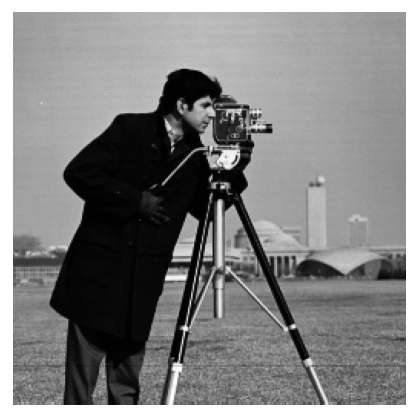

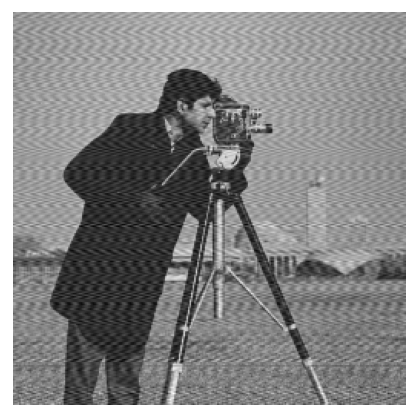

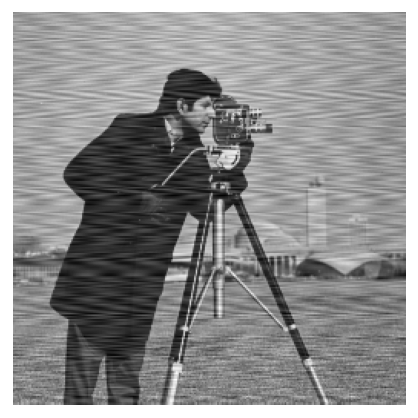

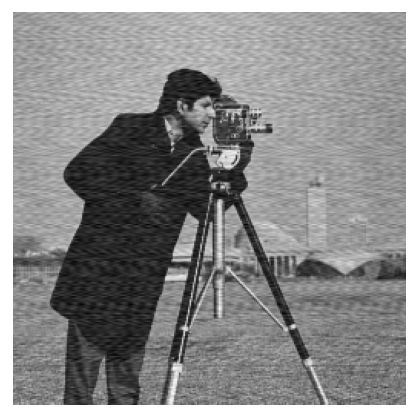

In [4]:
# show
plt.figure(dpi=130)
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.savefig('images/I.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(noisy1, cmap='gray')
plt.axis('off')
plt.savefig('images/noisy1.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(noisy2, cmap='gray')
plt.axis('off')
plt.savefig('images/noisy2.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(noisy12, cmap='gray')
plt.axis('off')
plt.savefig('images/noisy12.png', bbox_inches='tight')
plt.show()

## 1.d

In [5]:
def get_W(n):
    k = np.arange(0,n,1)

    w = np.exp(-1j*2*np.pi/n)

    W = np.sqrt(1/n)*w**(k.reshape((n,1))*k.reshape((1,n)))

    return W

In [6]:
W = get_W(n)

DFT_I = I@W
DFT_noisy1 = noisy1@W
DFT_noisy2 = noisy2@W
DFT_noisy12 = noisy12@W

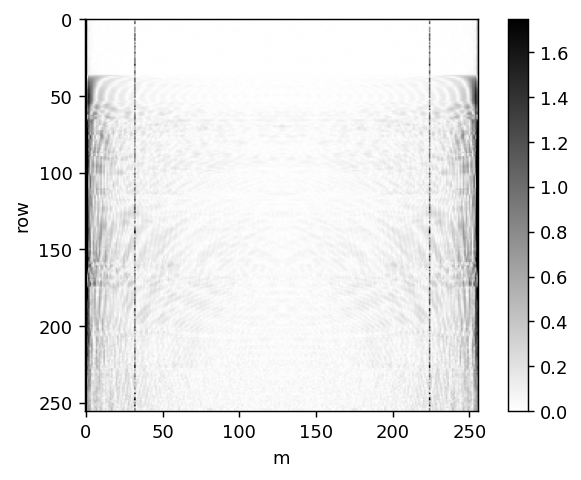

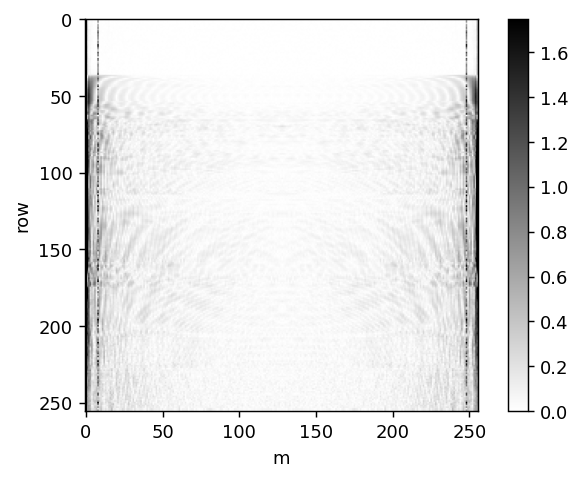

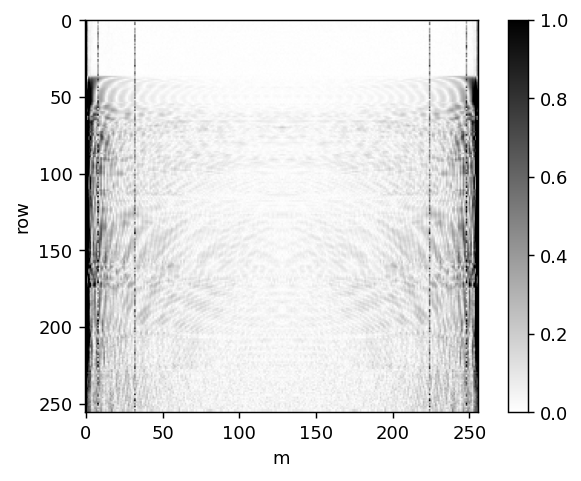

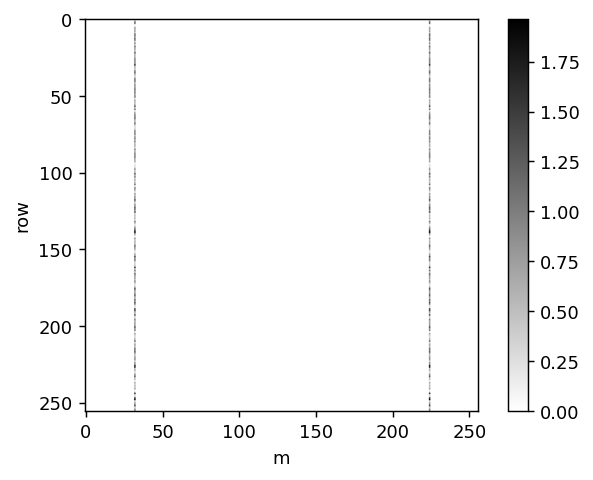

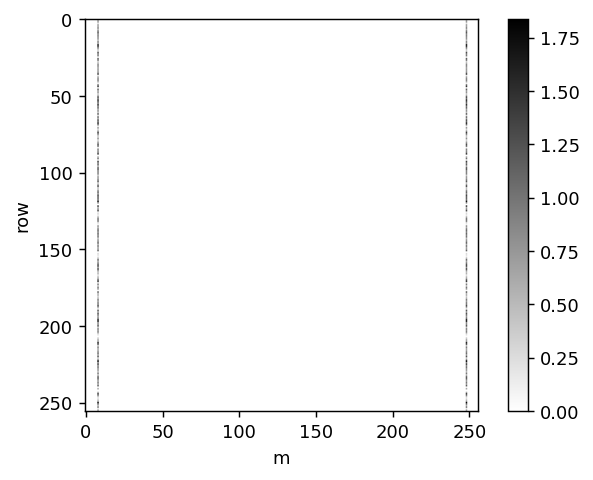

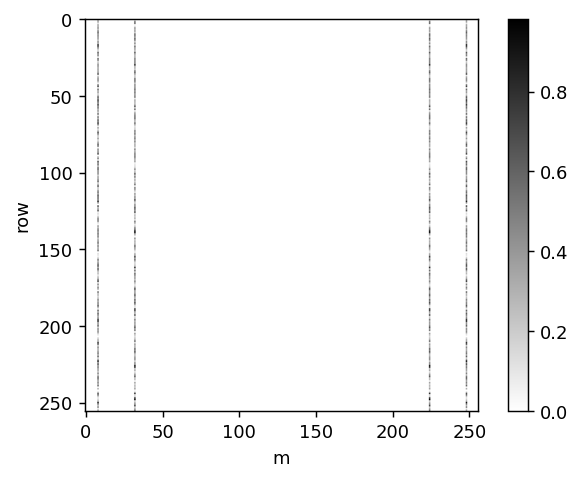

In [7]:
import matplotlib.colors as colors

plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy1), cmap='gray_r', vmin=0, vmax=1.75)
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy1_orig.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy2), cmap='gray_r', vmin=0, vmax=1.75)
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()

plt.savefig('images/DFT_noisy2_orig.png', bbox_inches='tight')
plt.show()
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy12), cmap='gray_r', vmin=0, vmax=1)
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy12_orig.png', bbox_inches='tight')
plt.show()

plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy1-DFT_I), cmap='gray_r')
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy1.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy2-DFT_I), cmap='gray_r')
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy2.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy12-DFT_I), cmap='gray_r')
# plt.axis('off')
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy12.png', bbox_inches='tight')
plt.show()

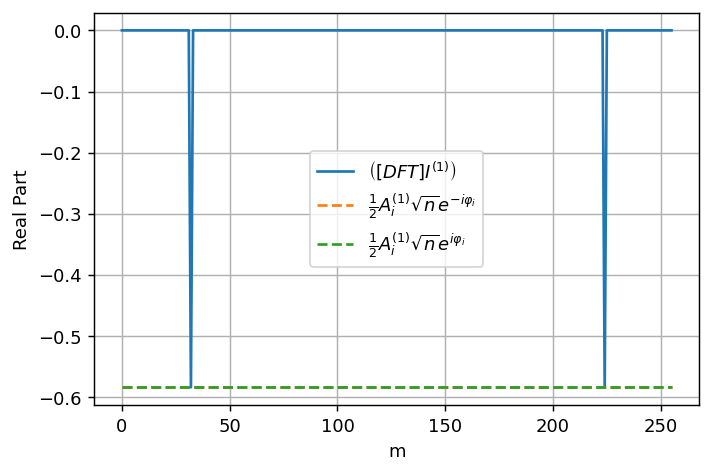

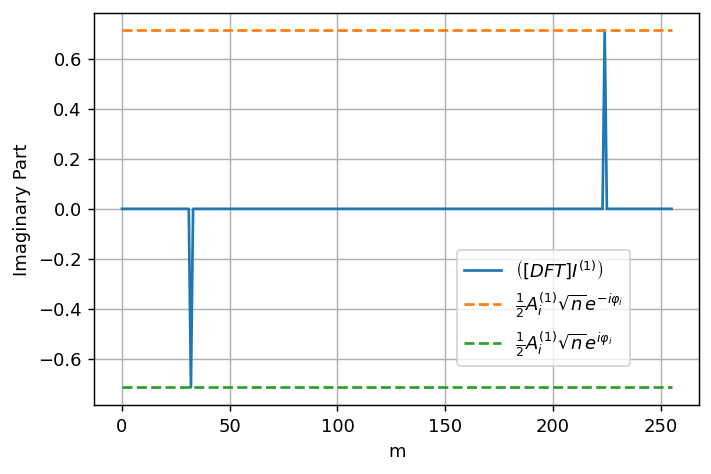

In [8]:
i = np.arange(0,256,1)
plt.figure(dpi=130)
plt.plot(i, np.real(DFT_noisy1-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(1\right)}\right)$')
plt.plot(i,np.real(np.ones(n)*(1/2)*A[0,0,0]*np.sqrt(n)*np.exp(-1j*phi[0,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(1\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.real(np.ones(n)*(1/2)*A[0,0,0]*np.sqrt(n)*np.exp(1j*phi[0,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(1\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Real Part')
plt.legend()
plt.savefig('images/noisy1_coeff_real.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.plot(i, np.imag(DFT_noisy1-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(1\right)}\right)$')
plt.plot(i,np.imag(np.ones(n)*(1/2)*A[0,0,0]*np.sqrt(n)*np.exp(-1j*phi[0,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(1\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.imag(np.ones(n)*(1/2)*A[0,0,0]*np.sqrt(n)*np.exp(1j*phi[0,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(1\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Imaginary Part')
plt.legend(loc=(0.6,0.1))
plt.savefig('images/noisy1_coeff_imaginary.png', bbox_inches='tight')
plt.show()

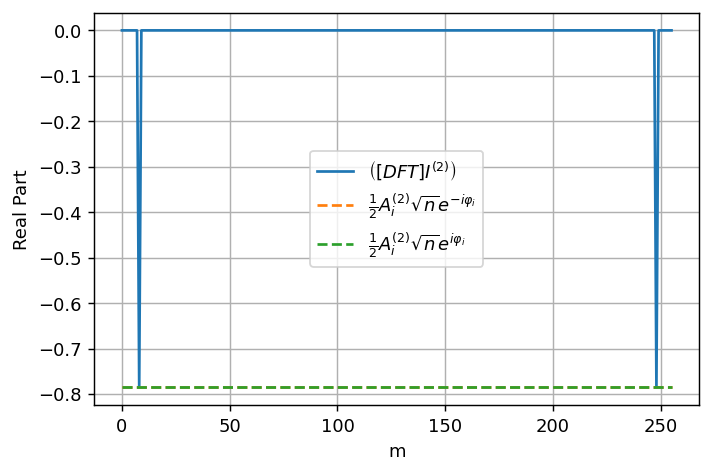

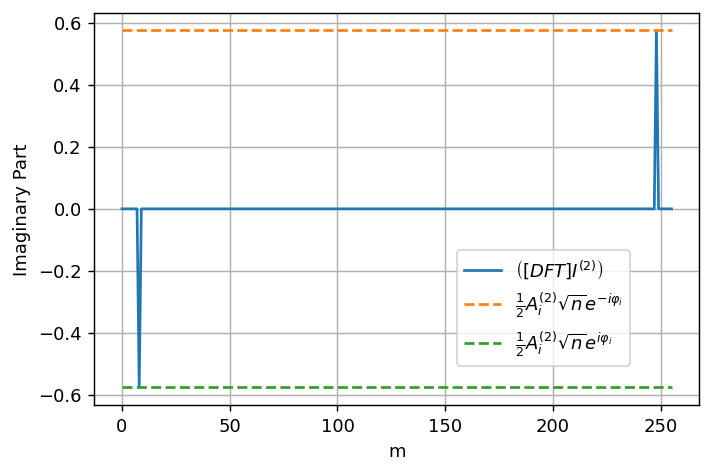

In [9]:
i = np.arange(0,256,1)
plt.figure(dpi=130)
plt.plot(i, np.real(DFT_noisy2-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(2\right)}\right)$')
plt.plot(i,np.real(np.ones(n)*(1/2)*A[1,0,0]*np.sqrt(n)*np.exp(-1j*phi[1,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(2\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.real(np.ones(n)*(1/2)*A[1,0,0]*np.sqrt(n)*np.exp(1j*phi[1,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(2\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Real Part')
plt.legend()
plt.savefig('images/noisy2_coeff_real.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.plot(i, np.imag(DFT_noisy2-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(2\right)}\right)$')
plt.plot(i,np.imag(np.ones(n)*(1/2)*A[1,0,0]*np.sqrt(n)*np.exp(-1j*phi[1,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(2\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.imag(np.ones(n)*(1/2)*A[1,0,0]*np.sqrt(n)*np.exp(1j*phi[1,0,0])), '--', label=r'$\frac{1}{2}A_{i}^{\left(2\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Imaginary Part')
plt.legend(loc=(0.6,0.1))
plt.savefig('images/noisy2_coeff_imaginary.png', bbox_inches='tight')
plt.show()

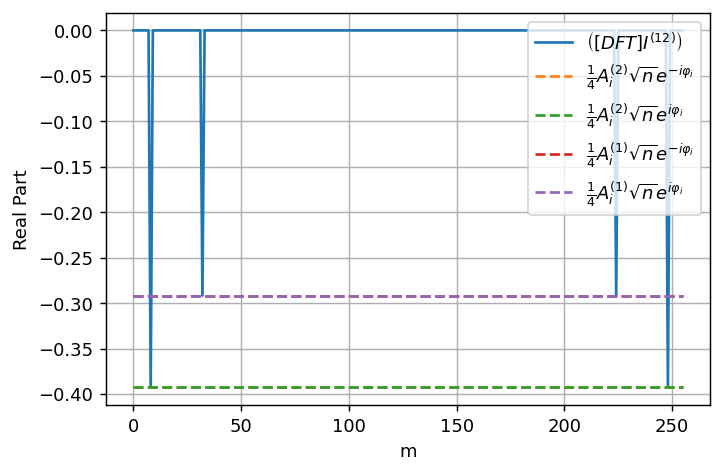

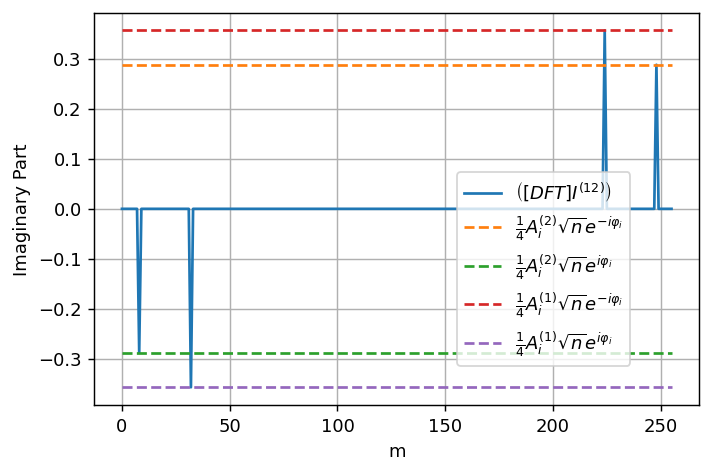

In [10]:
i = np.arange(0,256,1)
plt.figure(dpi=130)
plt.plot(i, np.real(DFT_noisy12-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(12\right)}\right)$')
plt.plot(i,np.real(np.ones(n)*(1/4)*A[1,0,0]*np.sqrt(n)*np.exp(-1j*phi[1,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(2\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.real(np.ones(n)*(1/4)*A[1,0,0]*np.sqrt(n)*np.exp(1j*phi[1,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(2\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.plot(i,np.real(np.ones(n)*(1/4)*A[0,0,0]*np.sqrt(n)*np.exp(-1j*phi[0,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(1\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.real(np.ones(n)*(1/4)*A[0,0,0]*np.sqrt(n)*np.exp(1j*phi[0,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(1\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Real Part')
plt.legend()
plt.savefig('images/noisy12_coeff_real.png', bbox_inches='tight')
plt.show()
plt.figure(dpi=130)
plt.plot(i, np.imag(DFT_noisy12-DFT_I)[0], label=r'$\left(\left[DFT\right]I^{\left(12\right)}\right)$')
plt.plot(i,np.imag(np.ones(n)*(1/4)*A[1,0,0]*np.sqrt(n)*np.exp(-1j*phi[1,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(2\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.imag(np.ones(n)*(1/4)*A[1,0,0]*np.sqrt(n)*np.exp(1j*phi[1,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(2\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.plot(i,np.imag(np.ones(n)*(1/4)*A[0,0,0]*np.sqrt(n)*np.exp(-1j*phi[0,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(1\right)}\sqrt{n}e^{-i\varphi_{i}}$')
plt.plot(i,np.imag(np.ones(n)*(1/4)*A[0,0,0]*np.sqrt(n)*np.exp(1j*phi[0,0,0])), '--', label=r'$\frac{1}{4}A_{i}^{\left(1\right)}\sqrt{n}e^{i\varphi_{i}}$')
plt.grid()
plt.xlabel('m')
plt.ylabel(r'Imaginary Part')
plt.legend(loc=(0.6,0.1))
plt.savefig('images/noisy12_coeff_imaginary.png', bbox_inches='tight')
plt.show()

## 1.e

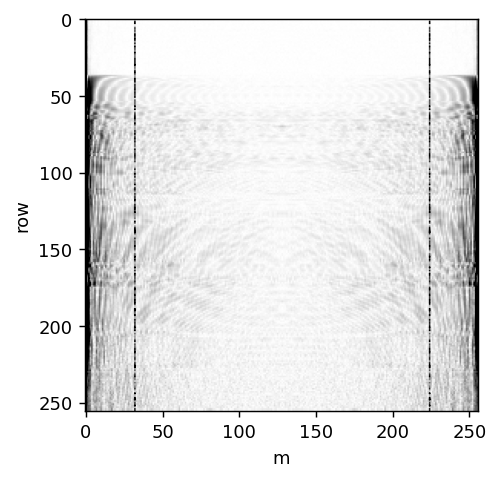

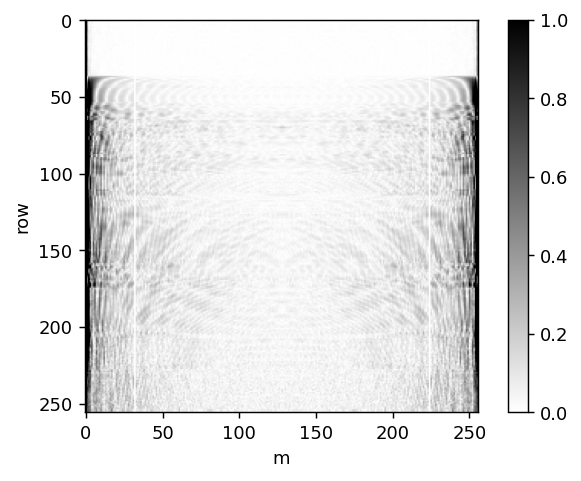

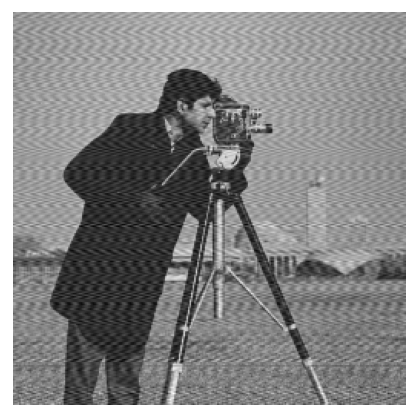

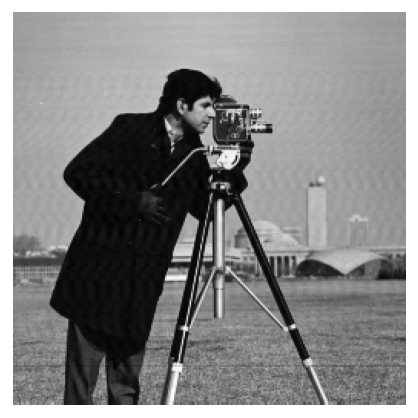

In [13]:
DFT_noisy1_clean = np.array(DFT_noisy1)
DFT_noisy1_clean[:,32] = 0
DFT_noisy1_clean[:,256-32] = 0

plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy1), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy1_clean), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy1_clean.png', bbox_inches='tight')
plt.show()

noisy1_reconst = np.real(DFT_noisy1@W.conj())
noisy1_clean_reconst = np.real(DFT_noisy1_clean@W.conj())

plt.figure(dpi=130)
plt.imshow(noisy1_reconst, cmap='gray')
plt.axis('off')
plt.show()
plt.figure(dpi=130)
plt.axis('off')
plt.imshow(noisy1_clean_reconst, cmap='gray')
plt.savefig('images/noisy1_clean.png', bbox_inches='tight')
plt.show()

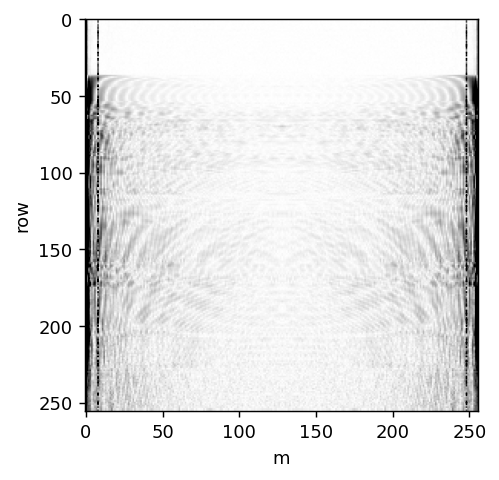

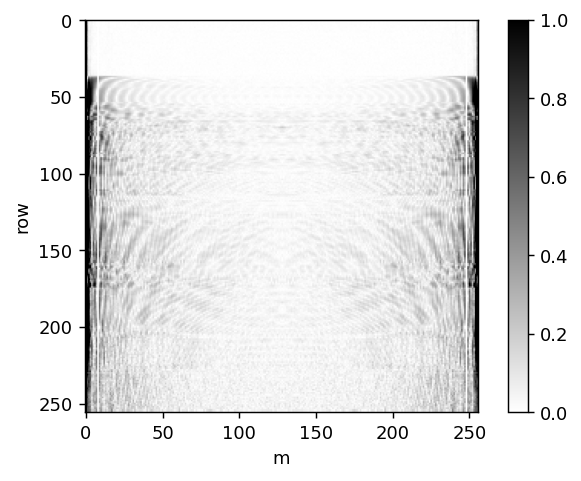

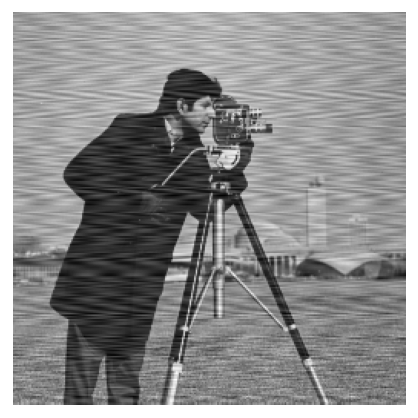

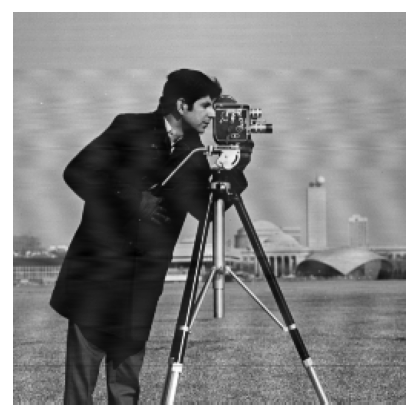

In [14]:
DFT_noisy2_clean = np.array(DFT_noisy2)
DFT_noisy2_clean[:,8] = 0
DFT_noisy2_clean[:,256-8] = 0

plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy2), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy2_clean), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.colorbar()
plt.savefig('images/DFT_noisy2_clean.png', bbox_inches='tight')
plt.show()

noisy2_reconst = np.real(DFT_noisy2@W.conj())
noisy2_clean_reconst = np.real(DFT_noisy2_clean@W.conj())

plt.figure(dpi=130)
plt.imshow(noisy2_reconst, cmap='gray')
plt.axis('off')
plt.show()
plt.figure(dpi=130)
plt.axis('off')
plt.imshow(noisy2_clean_reconst, cmap='gray')
plt.savefig('images/noisy2_clean.png', bbox_inches='tight')
plt.show()

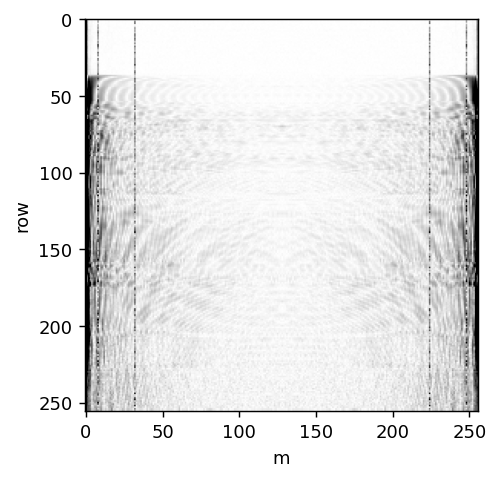

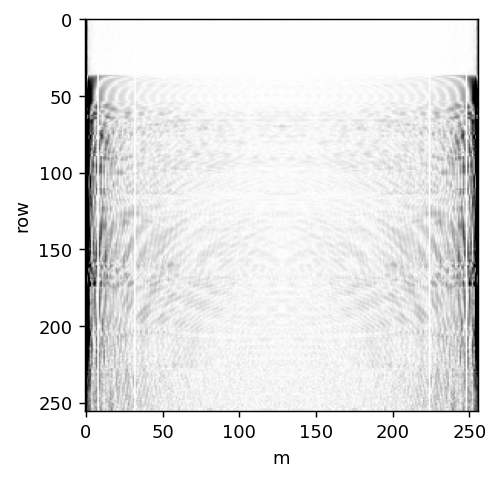

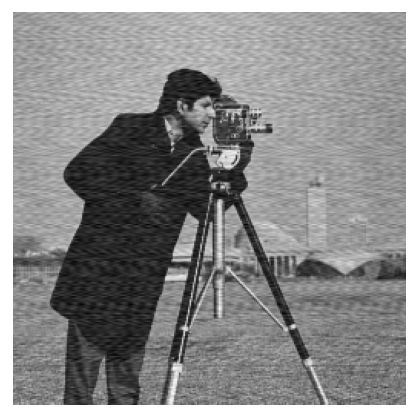

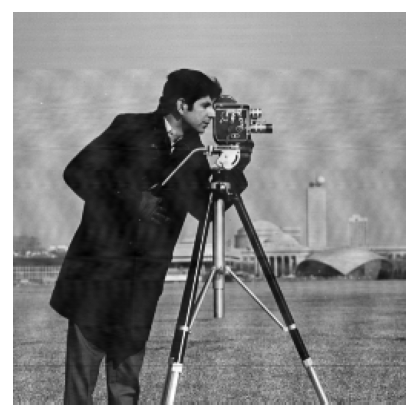

In [ ]:
DFT_noisy12_clean = np.array(DFT_noisy12)
DFT_noisy12_clean[:,8] = 0
DFT_noisy12_clean[:,256-8] = 0
DFT_noisy12_clean[:,32] = 0
DFT_noisy12_clean[:,256-32] = 0

plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy12), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.show()
plt.figure(dpi=130)
plt.imshow(np.abs(DFT_noisy12_clean), cmap='gray_r', vmin=0, vmax=1)
plt.xlabel('m')
plt.ylabel('row')
plt.savefig('images/DFT_noisy12_clean.png', bbox_inches='tight')
plt.show()

noisy12_reconst = np.real(DFT_noisy12@W.conj())
noisy12_clean_reconst = np.real(DFT_noisy12_clean@W.conj())

plt.figure(dpi=130)
plt.imshow(noisy12_reconst, cmap='gray')
plt.axis('off')
plt.show()
plt.figure(dpi=130)
plt.axis('off')
plt.imshow(noisy12_clean_reconst, cmap='gray')
plt.savefig('images/noisy12_clean.png', bbox_inches='tight')
plt.show()

In [ ]:
def mse(a,b):
    return np.sum((a-b)**2)

In [ ]:
print(f"I1: {mse(noisy1,I):.2f}")
print(f"I1 enhanced: {mse(noisy1_clean_reconst, I):.2f}")
print(f"I2: {mse(noisy2,I):.2f}")
print(f"I2 enhanced: {mse(noisy2_clean_reconst, I):.2f}")
print(f"I12: {mse(noisy12,I):.2f}")
print(f"I12 enhanced: {mse(noisy12_clean_reconst, I):.2f}")

I1: 385.99
I1 enhanced: 6.67
I2: 412.41
I2 enhanced: 54.26
I12: 199.60
I12 enhanced: 60.93


-7.105427357601002e-14

In [ ]:
mse(noisy12_clean_reconst, I) - (mse(noisy1_clean_reconst, I) + mse(noisy2_clean_reconst, I))

-7.105427357601002e-14

In [ ]:
print(np.sum(np.abs(DFT_I[:,32])**2) + np.sum(np.abs(DFT_I[:,256-32])**2))
print(np.sum(np.abs(DFT_I[:,8])**2) + np.sum(np.abs(DFT_I[:,256-8])**2))

6.6693386628822875
54.26084479782932
